In [1]:
import sys
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image):
    plt.figure(figsize=(12, 8))
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.title(tit)
    plt.axis('off')    
    plt.show()
    
    
DIR = './vision/'

# 영상 특징 추출

## Lane detection

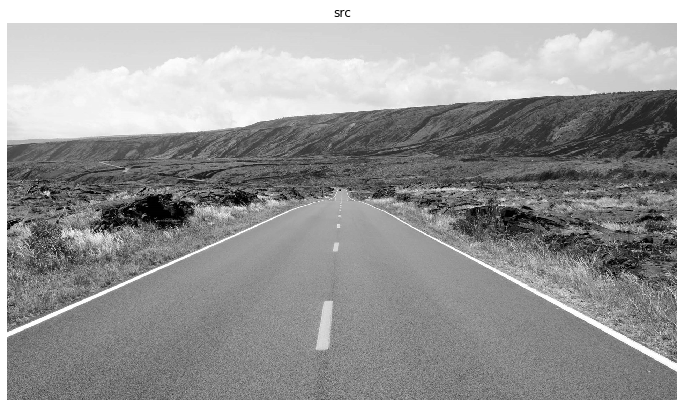

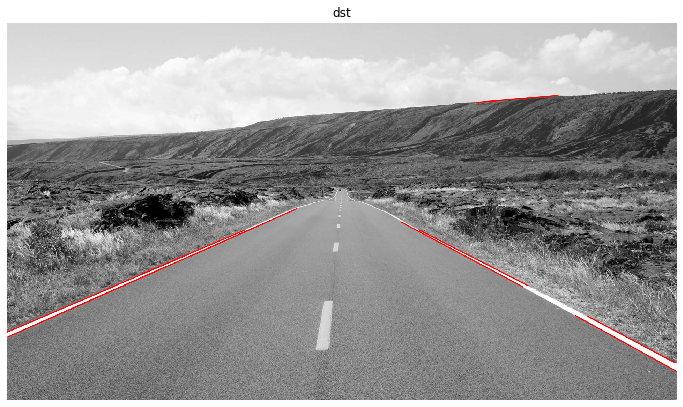

In [2]:
import math

src = cv2.imread(DIR + 'lane.jpg', cv2.IMREAD_GRAYSCALE)
dst = cv2.GaussianBlur(src, (11,11), 0.0)
edge = cv2.Canny(dst, 60, 150)
lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 50, minLineLength=200, maxLineGap=5)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            cv2.line(dst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

imshow('src', src)
imshow('dst', dst)

9
-0.4444444444444444
-0.4263322884012539
0.5512367491166078
0.5307017543859649
0.5105740181268882
-0.42718446601941745
-0.42718446601941745
-0.44537815126050423
-0.4446902654867257


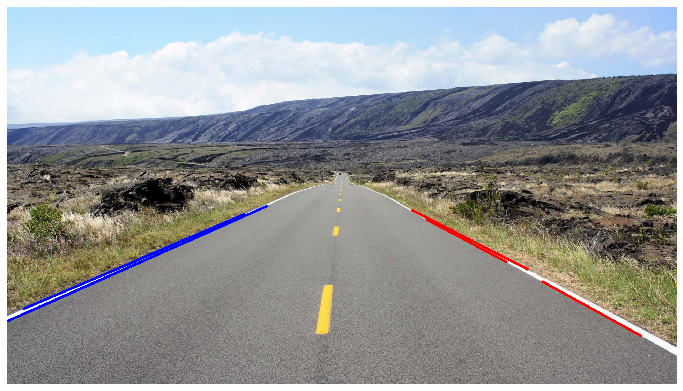

In [3]:
src = cv2.imread(DIR + 'lane.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (11, 11), 0)
edge = cv2.Canny(src, 60, 150)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 30, minLineLength=200, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

src = cv2.imread(DIR + 'lane.jpg')
print(lines.shape[0])
for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            w = (pt1[1]-pt2[1])/(pt1[0]-pt2[0]) # 각 선들의 기울기
            print(w)
            if w >0:
                col = (0,0,255) # 하향 그래프
            else:
                col = (255,0,0) # 상향 그래프
            cv2.line(src, pt1, pt2, col,5, cv2.LINE_AA)
            
imshow('',src) 

In [4]:
src = cv2.imread(DIR + 'lane.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (11, 11), 0)
edge = cv2.Canny(src, 60, 150)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 30, minLineLength=200, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

print(lines.shape[0])
for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            w = (pt1[1]-pt2[1])/(pt1[0]-pt2[0]) # 각 선들의 기울기
            if w >0:
                rightlane = (pt1,pt2)
                
            else:
                leftlane = (pt1,pt2)
               

    
print(leftlane)
print(rightlane)

9
((2, 899), (454, 698))
((1161, 582), (1492, 751))


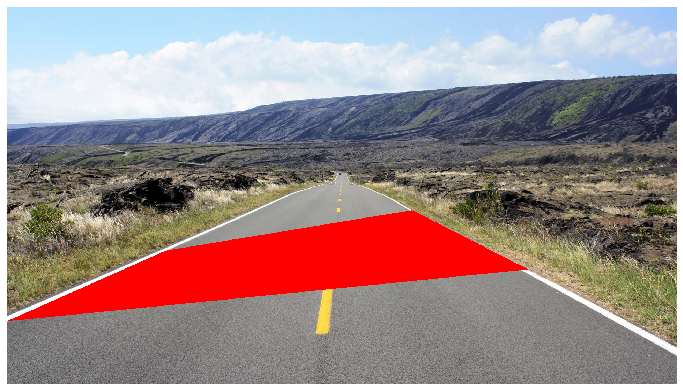

In [5]:
poly = []
poly.append(list(leftlane[0]))
poly.append(list(leftlane[1]))
poly.append(list(rightlane[0]))
poly.append(list(rightlane[1]))

src = cv2.imread(DIR + 'lane.jpg')

poly = np.array(poly)
cv2.fillPoly(src, [poly], (0,0,255))

imshow("",src)

In [6]:
poly

array([[   2,  899],
       [ 454,  698],
       [1161,  582],
       [1492,  751]], dtype=int32)

9
(64, 872) (649, 612)
(48, 864) (367, 728)
(1534, 786) (1817, 942)
(1203, 609) (1431, 730)
(1161, 582) (1492, 751)
(371, 725) (680, 593)
(284, 763) (490, 675)
(506, 676) (744, 570)
(2, 899) (454, 698)
((2, 899), (454, 698)) ((1161, 582), (1492, 751))


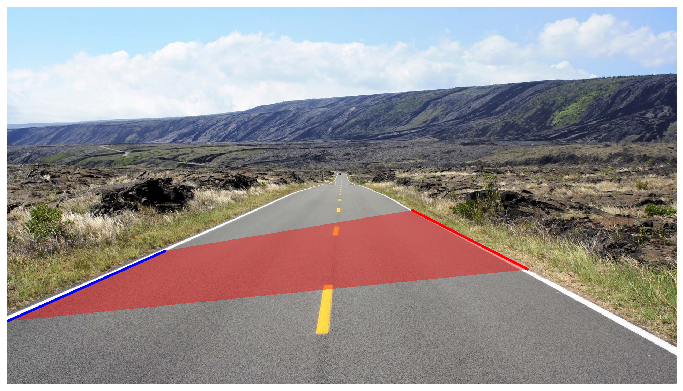

In [7]:
src = cv2.imread(DIR + 'lane.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (11, 11), 0)
edge = cv2.Canny(src, 60, 150)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 30, minLineLength=200, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

print(lines.shape[0])
for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])
            print(pt1,pt2)
            w = (pt1[1]-pt2[1])/(pt1[0]-pt2[0]) # 각 선들의 기울기
            if w >0:
                rightlane = (pt1,pt2)
                
            else:
                leftlane = (pt1,pt2)
print(leftlane, rightlane)
                
poly = []
poly.append(list(leftlane[0]))
poly.append(list(leftlane[1]))
poly.append(list(rightlane[0]))
poly.append(list(rightlane[1]))

src = cv2.imread(DIR + 'lane.jpg')
mask = src.copy()     

poly = np.array(poly)
cv2.fillPoly(mask, [poly], (0,0,255))

blend = cv2.addWeighted(mask, 0.4, src, 0.6, 0)
cv2.line(blend, leftlane[0], leftlane[1], (255,0,0),5, cv2.LINE_AA)
cv2.line(blend, rightlane[0], rightlane[1], (0,0,255),5, cv2.LINE_AA)

imshow("",blend)

In [8]:
src = cv2.imread(DIR + 'lane.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.GaussianBlur(src, (11, 11), 0)
edge = cv2.Canny(src, 60, 150)

lines = cv2.HoughLinesP(edge, 1, math.pi / 180, 30, minLineLength=200, maxLineGap=5)

dst = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

rightlane = []
leftlane = []
for i in range(lines.shape[0]):
            pt1 = (lines[i][0][0], lines[i][0][1])
            pt2 = (lines[i][0][2], lines[i][0][3])

            w = (pt1[1]-pt2[1])/(pt1[0]-pt2[0]) # 각 선들의 기울기
            
            if w >0:
                rightlane.append(list(pt1))
                rightlane.append(list(pt2))
            else:
                leftlane.append(list(pt1))
                leftlane.append(list(pt2))

In [9]:
leftlane = np.array(leftlane)
rightlane = np.array(rightlane)

p1 = np.min(leftlane[:,0]), np.max(leftlane[:,1]) 
p2 = np.max(leftlane[:,0]), np.min(leftlane[:,1]) 
leftlane = [p1,p2]
print(leftlane)

p1 = np.min(rightlane[:,0]), np.min(rightlane[:,1]) 
p2 = np.max(rightlane[:,0]), np.max(rightlane[:,1]) 
rightlane = [p1,p2]
print(rightlane)

[(2, 899), (744, 570)]
[(1161, 582), (1817, 942)]


[[2, 899], [744, 570], [1161, 582], [1817, 942]]


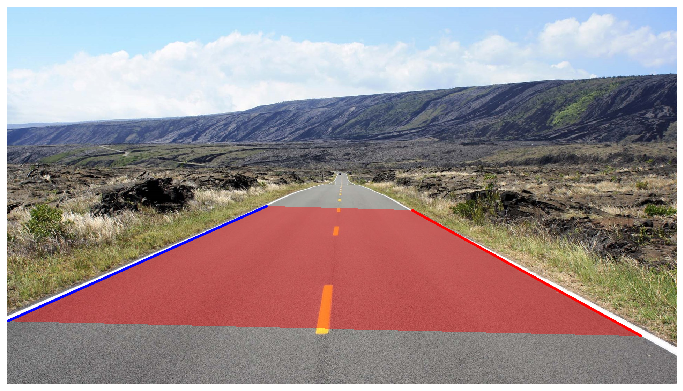

In [10]:
poly = []
poly.append(list(leftlane[0]))
poly.append(list(leftlane[1]))
poly.append(list(rightlane[0]))
poly.append(list(rightlane[1]))
print(poly)

src = cv2.imread(DIR + 'lane.jpg')
mask = src.copy()     

poly = np.array(poly)
cv2.fillPoly(mask, [poly], (0,0,255))

blend = cv2.addWeighted(mask, 0.4, src, 0.6, 0)
cv2.line(blend, leftlane[0], leftlane[1], (255,0,0),5, cv2.LINE_AA)
cv2.line(blend, rightlane[0], rightlane[1], (0,0,255),5, cv2.LINE_AA)

imshow("",blend)

## circle detection

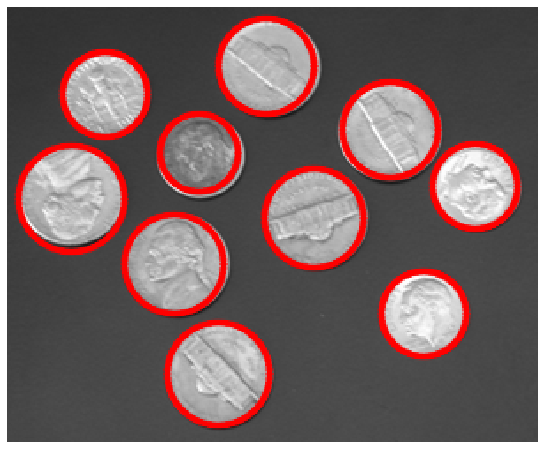

In [11]:
src = cv2.imread(DIR + 'coins.png', cv2.IMREAD_GRAYSCALE)

blurred = cv2.blur(src,(3,3))
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1,50,param1 = 150, param2=30)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(circles.shape[1]):
    cx,cy,radius = circles[0][i]
    cv2.circle(dst,(cx,cy), int(radius), (0,0,255), 2, cv2.LINE_AA)
    
imshow("",dst)
    

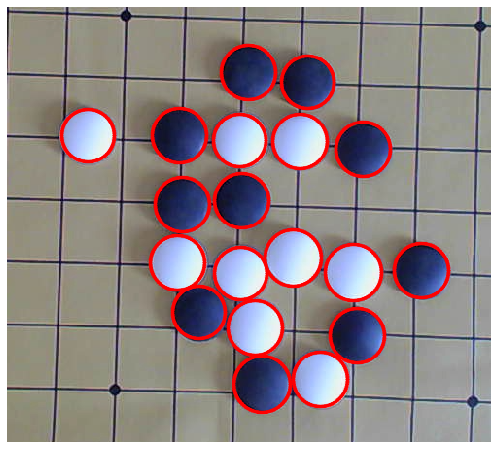

In [12]:
src = cv2.imread(DIR + 'stone.png')

img = cv2.GaussianBlur(src,(5,5),0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1,20,param1 = 100, param2=30, minRadius=10, maxRadius=50)

dst = cv2.imread(DIR + 'stone.png')

for i in range(circles.shape[1]):
    cx,cy,radius = circles[0][i]
    cv2.circle(dst,(cx,cy), int(radius), (0,0,255), 2, cv2.LINE_AA)
    
imshow("",dst)

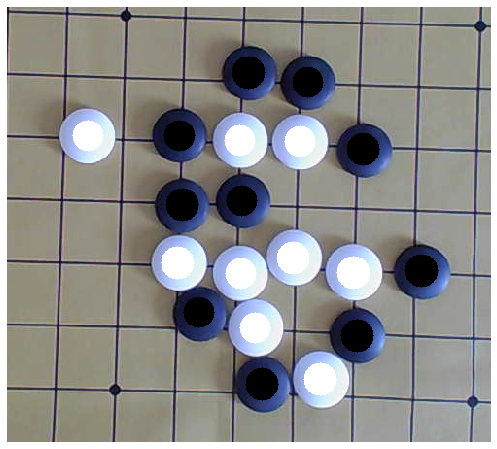

In [13]:
src = cv2.imread(DIR + 'stone.png')

img = cv2.GaussianBlur(src,(5,5),0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1,20,param1 = 100, param2=30, minRadius=10, maxRadius=50)
# 1 : 동일해상도

dst = cv2.imread(DIR + 'stone.png')

for i in range(circles.shape[1]):
    cx,cy,radius = circles[0][i]
    g = gray[int(cy), int(cx)]
    if g > 128:
        cv2.circle(dst,(cx,cy), int(radius*0.6), (255,255,255), -1)
    else:
        cv2.circle(dst,(cx,cy), int(radius*0.6), (0,0,0), -1)
    
imshow("",dst)

## corner detection

In [14]:
src = cv2.imread(DIR + 'building.jpg', cv2.IMREAD_GRAYSCALE)
harris = cv2.cornerHarris(src, 3,3,0.04) 
# 3: 코너 검출을 위해 고려할 이웃 픽셀의 범위
# 3: sobel 미분에 사용된 인자 값
# 0.04: Harris 코너 검출 수학식 R에서 k값

print(harris.shape)

(600, 868)


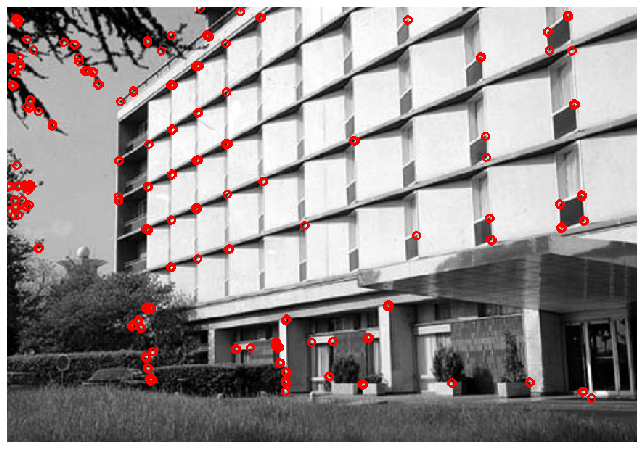

In [15]:
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)
imshow("",dst)

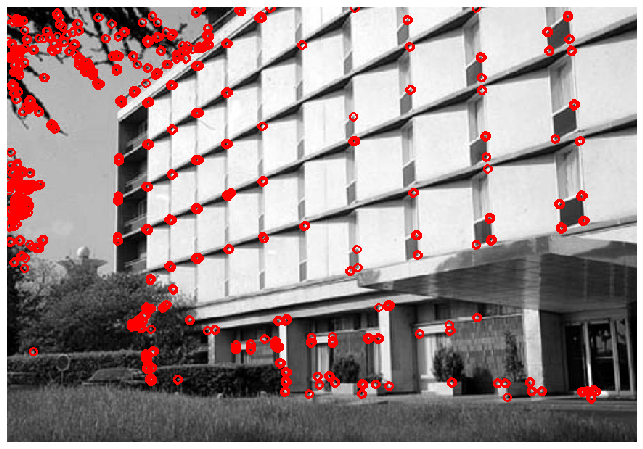

In [16]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris.shape[0]):
        for x in range(harris.shape[1]):
            if harris[y, x] > 0.001:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)
imshow("", dst)

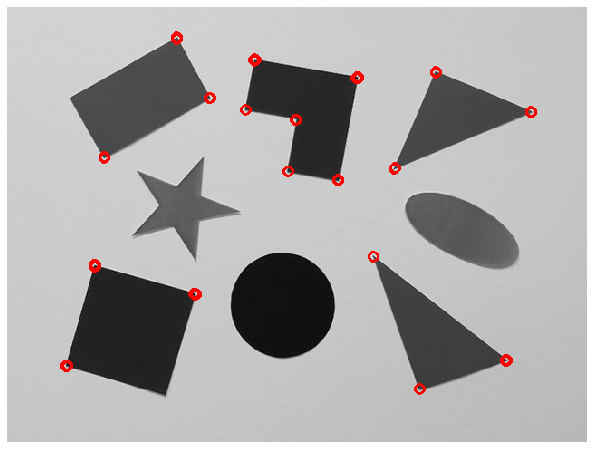

In [17]:
src = cv2.imread(DIR + 'polygon.bmp', cv2.IMREAD_GRAYSCALE)
harris = cv2.cornerHarris(src, 3,3,0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)
imshow("",dst)

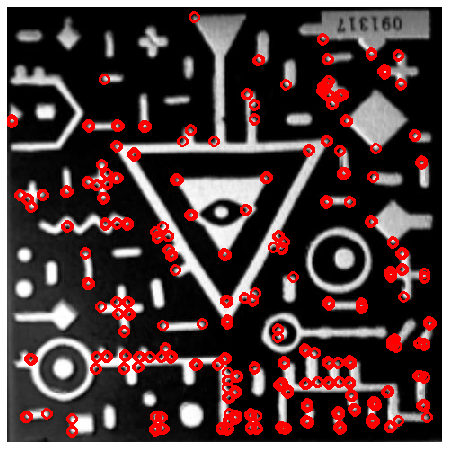

In [18]:
src = cv2.imread(DIR + 'sample.jpg', cv2.IMREAD_GRAYSCALE)
harris = cv2.cornerHarris(src, 3,3,0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)
imshow("",dst)

## Contour

In [19]:
src = cv2.imread(DIR + 'contours.bmp', cv2.IMREAD_GRAYSCALE)

contours, _ =cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(type(contours))
print(len(contours))
print(contours[0].shape)
print(contours[1].shape)

cnt = contours[0] # 120개의 점
print(cnt[0,0,:]) # 첫번째 점
print(cnt[1,0,:]) # 두번째 점

<class 'list'>
9
(120, 1, 2)
(276, 1, 2)
[109 260]
[110 259]


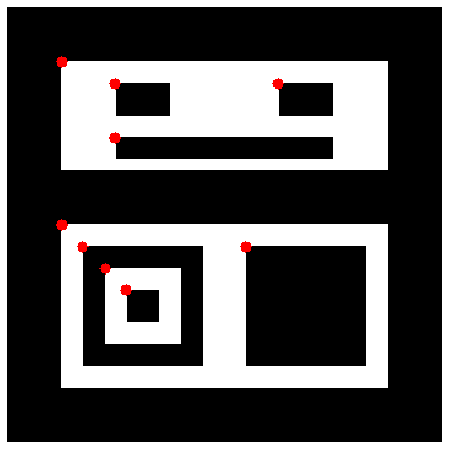

In [20]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(len(contours)):
    x=contours[i][0,0,0]
    y=contours[i][0,0,1]
    cv2.circle(dst, (int(x),int(y)),5,(0,0,255),-1)
imshow("",dst)

In [21]:
contours, _ =cv2.findContours(src, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print(type(contours))
print(len(contours))
print(contours[0].shape)
print(contours[1].shape)

cnt = contours[0] # 120개의 점
print(cnt[0,0,:]) # 첫번째 점
print(cnt[1,0,:]) # 두번째 점

<class 'list'>
9
(8, 1, 2)
(4, 1, 2)
[109 260]
[110 259]


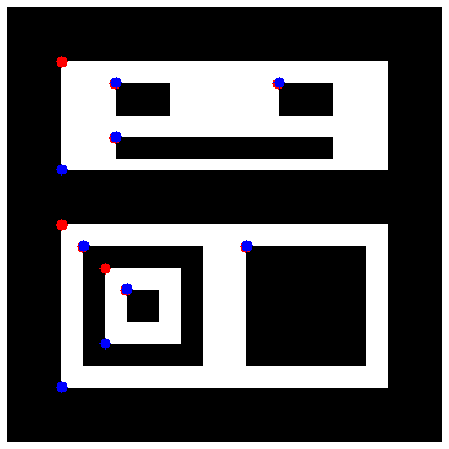

In [22]:
for i in range(len(contours)):
    x=contours[i][0,0,0]
    y=contours[i][0,0,1]
    cv2.circle(dst, (int(x),int(y)),5,(0,0,255),-1)
    
    x=contours[i][1,0,0]
    y=contours[i][1,0,1]
    cv2.circle(dst, (int(x),int(y)),5,(255,0,0),-1)
imshow("",dst)

In [23]:
src = cv2.imread(DIR + 'contours.bmp', cv2.IMREAD_GRAYSCALE)

contours, _ =cv2.findContours(src, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print(type(contours))
print(len(contours))
print(contours[0].shape)
print(contours[1].shape)

cnt = contours[0] # 120개의 점
print(cnt[0,0,:]) # 첫번째 점
print(cnt[1,0,:]) # 두번째 점

<class 'list'>
2
(896, 1, 2)
(796, 1, 2)
[ 50 200]
[ 50 201]


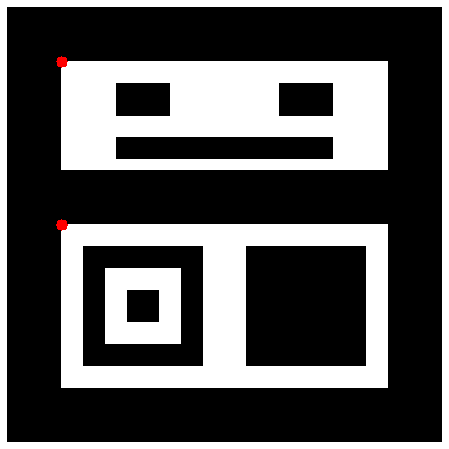

In [24]:
dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(len(contours)):
    x=contours[i][0,0,0]
    y=contours[i][0,0,1]
    cv2.circle(dst, (int(x),int(y)),5,(0,0,255),-1)
imshow("",dst)

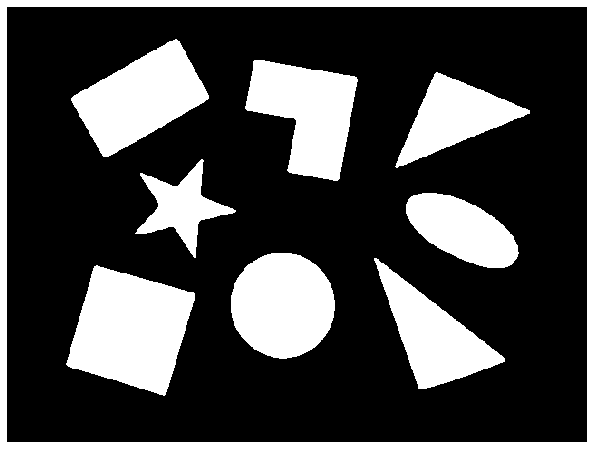

In [25]:
src = cv2.imread(DIR + 'polygon.bmp', 0)

_, img_bin =cv2.threshold(src, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
img_bin = cv2.medianBlur(img_bin, 5)
imshow("", img_bin )

In [26]:
contours, _ =cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

print(len(contours))

8


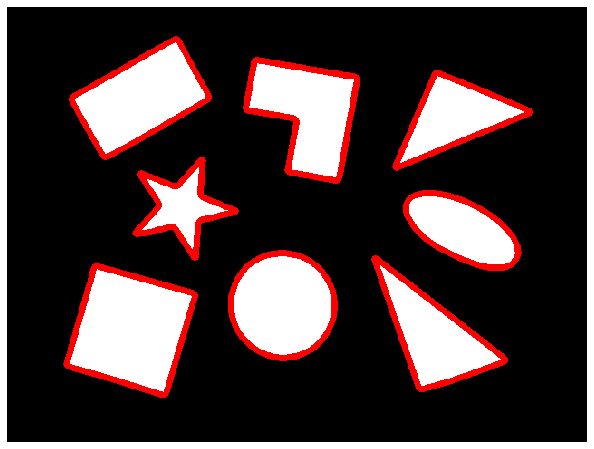

In [27]:
dst = cv2.cvtColor(img_bin, cv2.COLOR_GRAY2BGR)
cv2.drawContours(dst, contours, -1, (0,0,255), 5)
imshow("",dst)

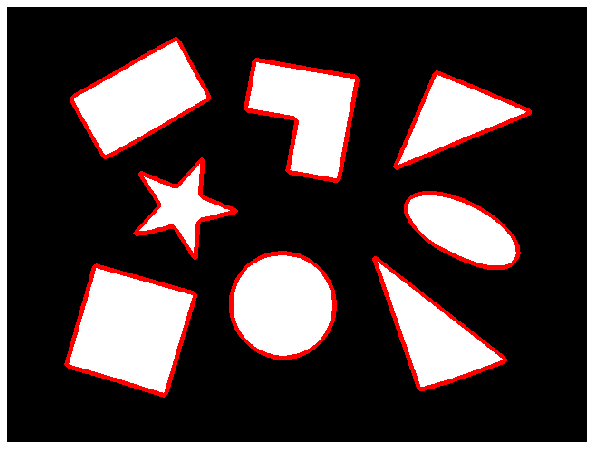

In [28]:
dst = cv2.cvtColor(img_bin, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    count = cnt.shape[0]
    if count > 200:
        cv2.drawContours(dst, [cnt], 0, (0,0,255), 3)

imshow('', dst)

In [29]:
cnt = contours[0]
print(cnt.shape)
epsilon = cv2.arcLength(cnt, True) * 0.02 
approx = cv2.approxPolyDP(cnt, epsilon, True)
print(approx.shape)   

(438, 1, 2)
(4, 1, 2)


438
384
325
285
374
358
445
362


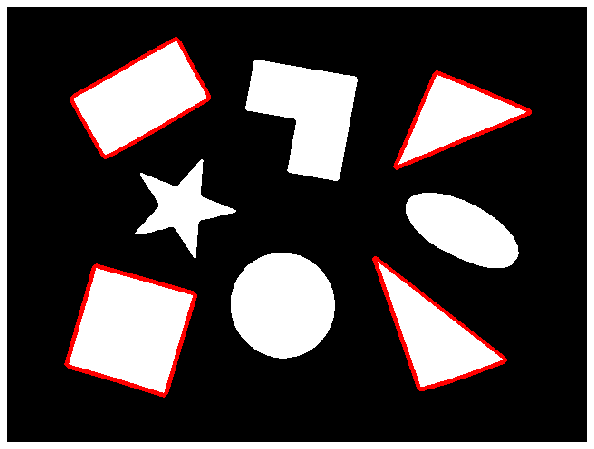

In [30]:
dst = cv2.cvtColor(img_bin, cv2.COLOR_GRAY2BGR)
for cnt in contours :
    count = cnt.shape[0]
    print(count)        
    approx = cv2.approxPolyDP(cnt, 0.03, True)
    count = approx.shape[0]
    
    
    if count > 200 :
        cv2.drawContours(dst, [cnt], 0, (0, 0, 255), 3)
imshow("", dst)      
    
    

4
3
8
8
10
3
6
4


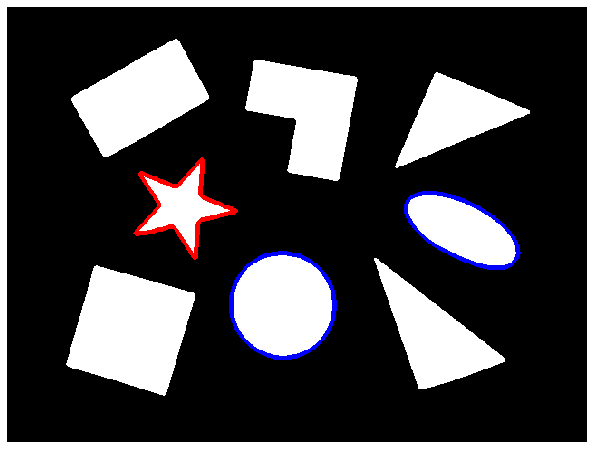

In [31]:
dst = cv2.cvtColor(img_bin, cv2.COLOR_GRAY2BGR)
for cnt in contours :
    epsilon = cv2.arcLength(cnt, True) *0.02   
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    count = approx.shape[0]
    print(count)
    if count == 10 :
        cv2.drawContours(dst, [cnt], 0, (0, 0, 255), 3)
    elif count == 8: 
        cv2.drawContours(dst, [cnt], 0, (255,0,0), 3)
imshow("", dst)      

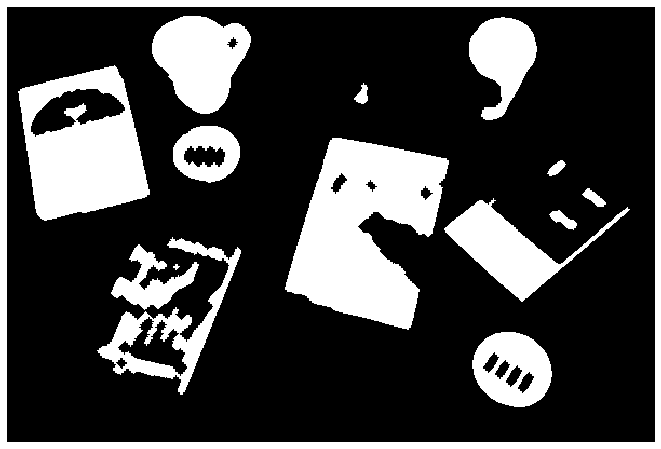

In [43]:
src = cv2.imread(DIR + 'book.jpg', 0)

_, img_bin =cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_bin = cv2.medianBlur(img_bin, 5)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel, iterations = 1)
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel, iterations = 2)

imshow("", img_bin)

In [44]:
contours, _ =cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

14


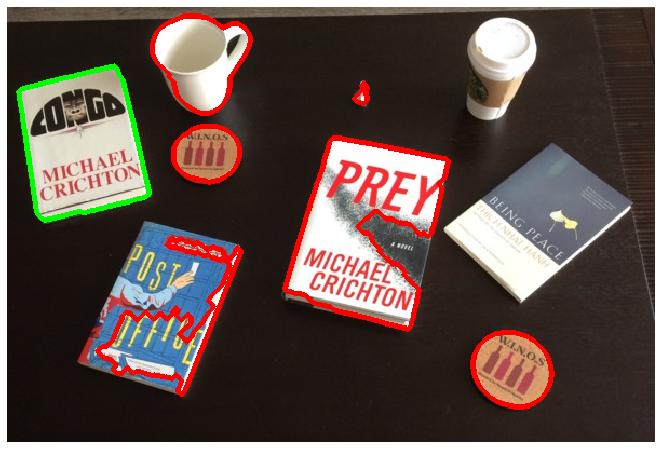

In [45]:
src = cv2.imread(DIR + 'book.jpg')

for cnt in contours :
    epsilon = cv2.arcLength(cnt, True) *0.02   
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    count = approx.shape[0]
    if count == 4 :
        cv2.drawContours(src, [cnt], 0, (0, 255,0), 3)
    elif count == 8:
        cv2.drawContours(src, [cnt], 0, (0, 0,255), 3)
    
imshow("", src)      